# YSC4216 Machine Learning Project – Plot results
Andrew Siow

In [68]:
!pip install pandas
!pip install seaborn

## Accuracy plots

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store train and validation accuracies for each file
train_accuracies = []
validation_accuracies = []

# Loop through the files and read the data
for i in range(10):
    file_path = f'data/augment{i}.txt'
    data = pd.read_csv(file_path)
    
    # Append the accuracies to the respective lists, with a label indicating the file number
    train_accuracies.append(data['Train Accuracy'].rename(f'Train Accuracy {i}'))
    validation_accuracies.append(data['Validation Accuracy'].rename(f'Validation Accuracy {i}'))

data = pd.read_csv('data/fullcifar.txt')
# Append the accuracies to the respective lists, with a label indicating the file number
train_accuracies.append(data['Train Accuracy'].rename(f'Train Accuracy Full'))
validation_accuracies.append(data['Validation Accuracy'].rename(f'Validation Accuracy Full'))
    
# Convert lists to DataFrame for easier plotting, using the concatenation method to preserve unique column names
train_accuracies_df = pd.concat(train_accuracies, axis=1)
validation_accuracies_df = pd.concat(validation_accuracies, axis=1)

# Set the epoch number as index
train_accuracies_df.index.name = 'Epoch'
validation_accuracies_df.index.name = 'Epoch'

# Reset index to get 'Epoch' as a column for plotting
train_accuracies_df_reset = train_accuracies_df.reset_index().melt(id_vars=['Epoch'], var_name='i', value_name='Train Accuracy')
validation_accuracies_df_reset = validation_accuracies_df.reset_index().melt(id_vars=['Epoch'], var_name='i', value_name='Validation Accuracy')


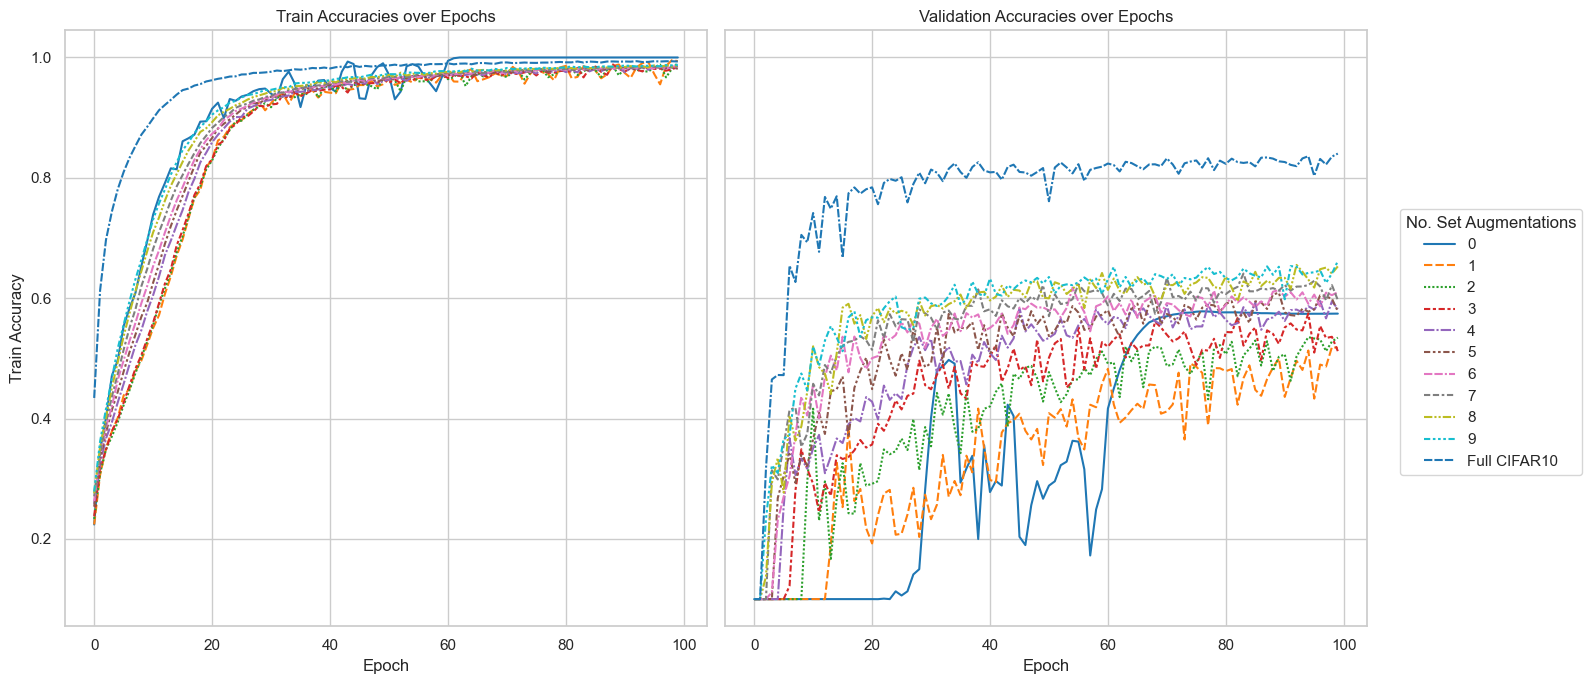

In [70]:
# Now we plot the data
# Set seaborn style with grid and dashed lines
sns.set(style="whitegrid")

# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

# Plot Train Accuracies
sns.lineplot(ax=ax[0], data=train_accuracies_df_reset, x='Epoch', y='Train Accuracy', hue='i', palette='tab10', style='i', dashes=True)
ax[0].set_title('Train Accuracies over Epochs')
# Remove the legend from the first plot, since we'll add it separately
ax[0].get_legend().remove()

# Plot Validation Accuracies
sns.lineplot(ax=ax[1], data=validation_accuracies_df_reset, x='Epoch', y='Validation Accuracy', hue='i', palette='tab10', style='i', dashes=True)
ax[1].set_title('Validation Accuracies over Epochs')
# Remove the legend from the second plot
ax[1].get_legend().remove()

# Adjust layout slightly to make room for the legend outside the plot
plt.tight_layout(rect=[0, 0, 0.995, 1])

# Get handles and labels for legend
handles, labels = ax[0].get_legend_handles_labels()
# Create custom labels as per your requirement
new_labels = [str(n) for n in range(len(handles) - 1)]

new_labels.append('Full CIFAR10')

# Create a single legend for the whole figure with custom labels, positioned to the right center of the second plot
fig.legend(handles, new_labels, title='No. Set Augmentations', bbox_to_anchor=(1, 0.5), loc='center left')

fig.savefig('train_valid_accuracies.png', dpi=300, bbox_inches='tight')
plt.show()



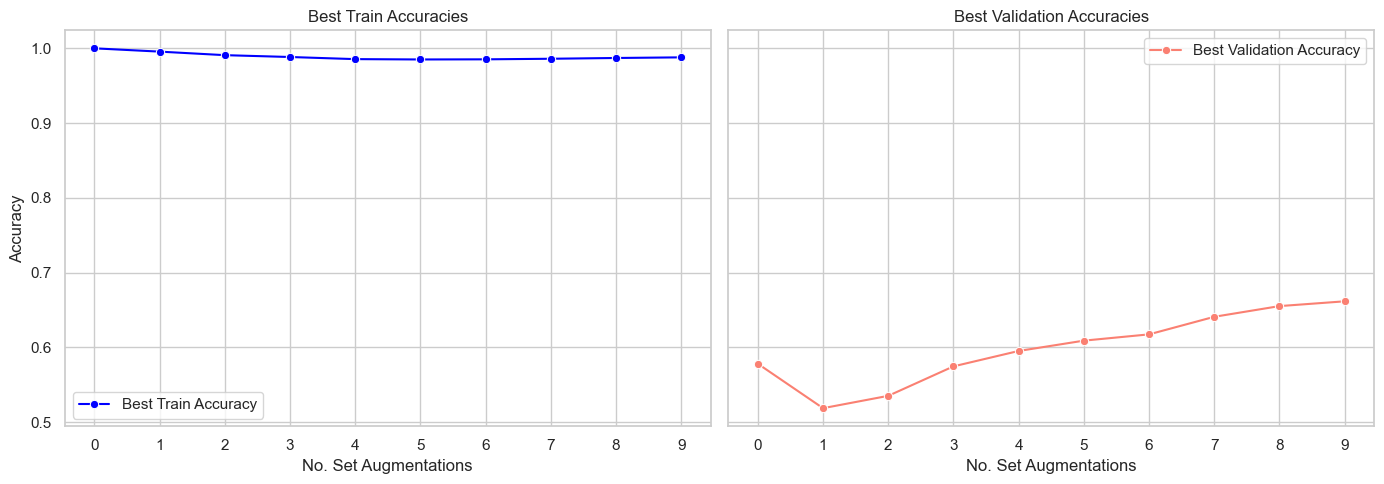

In [71]:
# Get the best train accuracy and validation accuracy in each file
best_train_accuracies = train_accuracies_df.max()
best_validation_accuracies = validation_accuracies_df.max()

# Exclude the entry for the full CIFAR-10 dataset
best_train_accuracies = best_train_accuracies[:-1]  
best_validation_accuracies = best_validation_accuracies[:-1] 

# Create a figure and two subplots, sharing the y-axis
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Extract file numbers (assuming file names are in the format 'Train Accuracy i' where i is the file number)
file_numbers = [i for i in range(len(best_train_accuracies))]

# Plot the best train accuracies
sns.lineplot(ax=ax[0], x=file_numbers, y=best_train_accuracies.values, marker='o', label='Best Train Accuracy', color = 'blue')
# Plot the best validation accuracies
sns.lineplot(ax=ax[1], x=file_numbers, y=best_validation_accuracies.values, marker='o', label='Best Validation Accuracy', color = 'salmon')

# Set the titles and labels
ax[0].set_title('Best Train Accuracies')
ax[1].set_title('Best Validation Accuracies')
for a in ax:
    a.set_xlabel('No. Set Augmentations')
    a.set_xticks(range(len(best_train_accuracies)))  # Ensure x-ticks are for each augmentation set
    a.set_xticklabels(range(len(best_train_accuracies)))  # Label x-ticks as 0 to 9

# Set the y-label on the first subplot only (since y-axis is shared)
ax[0].set_ylabel('Accuracy')

plt.tight_layout()
fig.savefig('train_valid_best_accuracies.png', dpi=300)
plt.show()



## Loss Plots (Cross-entropy loss)

In [72]:
# Initialize lists to store train and validation losses for each file
train_losses = []
validation_losses = []

# Loop through the files and read the data
for i in range(10):
    file_path = f'data/augment{i}.txt'
    data = pd.read_csv(file_path)
    
    # Append the losses to the respective lists, with a label indicating the file number
    train_losses.append(data['Train Loss'].rename(f'Train Loss {i}'))
    validation_losses.append(data['Validation Loss'].rename(f'Validation Loss {i}'))

data = pd.read_csv('data/fullcifar.txt')
# Append the accuracies to the respective lists, with a label indicating the file number
train_losses.append(data['Train Loss'].rename(f'Train Loss Full'))
validation_losses.append(data['Validation Loss'].rename(f'Validation Loss Full'))
    
# Convert lists to DataFrame for easier plotting, using the concatenation method to preserve unique column names
train_losses_df = pd.concat(train_losses, axis=1)
validation_losses_df = pd.concat(validation_losses, axis=1)

# Set the epoch number as index
train_losses_df.index.name = 'Epoch'
validation_losses_df.index.name = 'Epoch'

# Reset index to get 'Epoch' as a column for plotting
train_losses_df_reset = train_losses_df.reset_index().melt(id_vars=['Epoch'], var_name='i', value_name='Train Loss')
validation_losses_df_reset = validation_losses_df.reset_index().melt(id_vars=['Epoch'], var_name='i', value_name='Validation Loss')

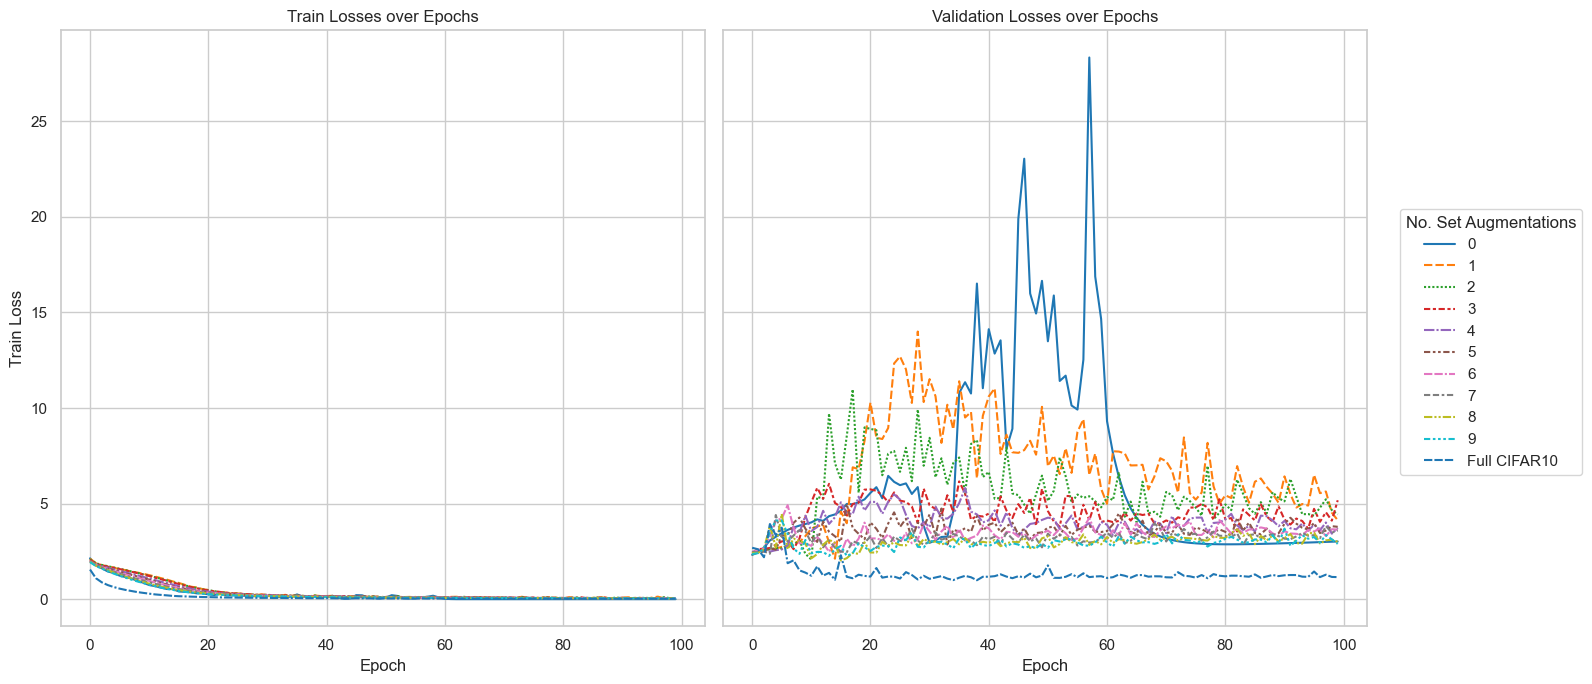

In [73]:
# Plotting

# Set seaborn style with grid and dashed lines
sns.set(style="whitegrid")

# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

# Plot Train Losses
sns.lineplot(ax=ax[0], data=train_losses_df_reset, x='Epoch', y='Train Loss', hue='i', palette='tab10', style='i', dashes=True)
ax[0].set_title('Train Losses over Epochs')
# Remove the legend from the first plot, since we'll add it separately
ax[0].get_legend().remove()

# Plot Validation Losses
sns.lineplot(ax=ax[1], data=validation_losses_df_reset, x='Epoch', y='Validation Loss', hue='i', palette='tab10', style='i', dashes=True)
ax[1].set_title('Validation Losses over Epochs')
# Remove the legend from the second plot
ax[1].get_legend().remove()

# Adjust layout slightly to make room for the legend outside the plot
plt.tight_layout(rect=[0, 0, 0.995, 1])

# Get handles and labels for legend
handles, labels = ax[0].get_legend_handles_labels()
# Create custom labels as per your requirement
new_labels = [str(n) for n in range(len(handles) - 1)]
new_labels.append('Full CIFAR10')

# Create a single legend for the whole figure with custom labels, positioned to the right center of the second plot
fig.legend(handles, new_labels, title='No. Set Augmentations', bbox_to_anchor=(1, 0.5), loc='center left')

fig.savefig('train_valid_losses.png', dpi=300, bbox_inches='tight')
plt.show()

